# **Health Insurance Price Prediction**

# **Import Data**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("/content/insurance.csv")

In [ ]:
df['region'] = df['region'].replace({'southwest':'Others','southeast':'Mumbai','northwest': 'Navi Mumbai','northeast': 'Pune'})

# **EDA & Feature Enggineering**

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,Others,16884.92400
1,18,male,33.770,1,no,Mumbai,1725.55230
2,28,male,33.000,3,no,Mumbai,4449.46200
3,33,male,22.705,0,no,Navi Mumbai,21984.47061
4,32,male,28.880,0,no,Navi Mumbai,3866.85520


In [ ]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,Navi Mumbai,10600.5483
1334,18,female,31.92,0,no,Pune,2205.9808
1335,18,female,36.85,0,no,Mumbai,1629.8335
1336,21,female,25.80,0,no,Others,2007.9450
1337,61,female,29.07,0,yes,Navi Mumbai,29141.3603


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
df.shape

(1338, 7)

In [ ]:
df.duplicated().sum()

1

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.shape

(1337, 7)

In [ ]:
df.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

<Axes: xlabel='smoker', ylabel='count'>

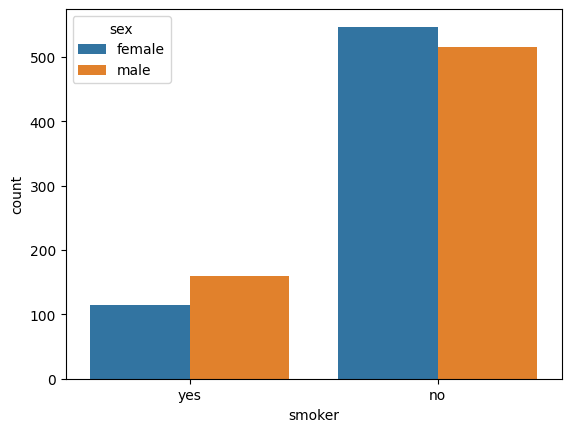

In [ ]:
sns.countplot(data=df, x='smoker', hue='sex')

In [ ]:
df['smoker'].unique()

array(['yes', 'no'], dtype=object)

<Axes: xlabel='age'>

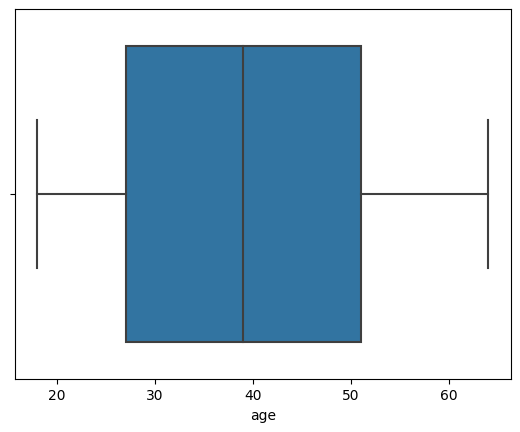

In [ ]:
sns.boxplot(data=df, x='age')

<Axes: xlabel='charges'>

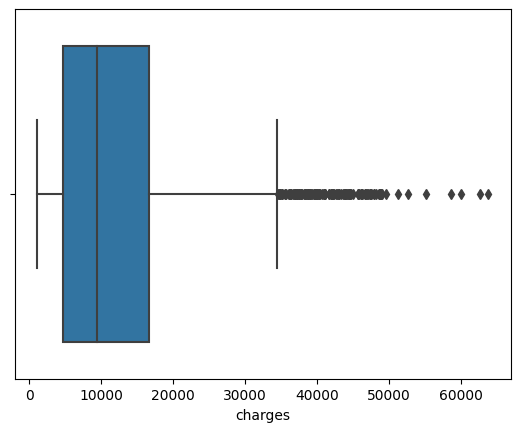

In [ ]:
sns.boxplot(data=df, x='charges')

In [ ]:
df['region'].value_counts()

Mumbai         364
Others         325
Navi Mumbai    324
Pune           324
Name: region, dtype: int64

<Axes: xlabel='region', ylabel='count'>

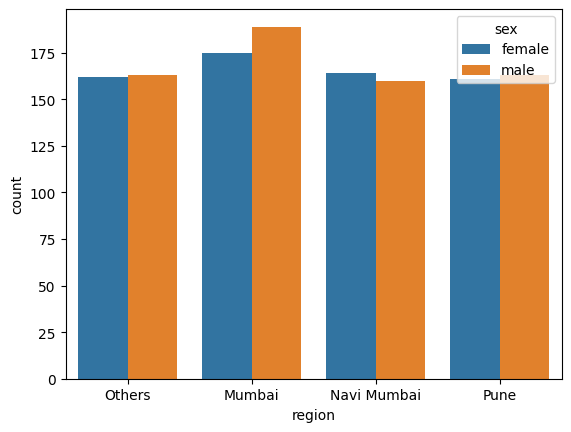

In [ ]:
sns.countplot(data=df, x='region', hue='sex')

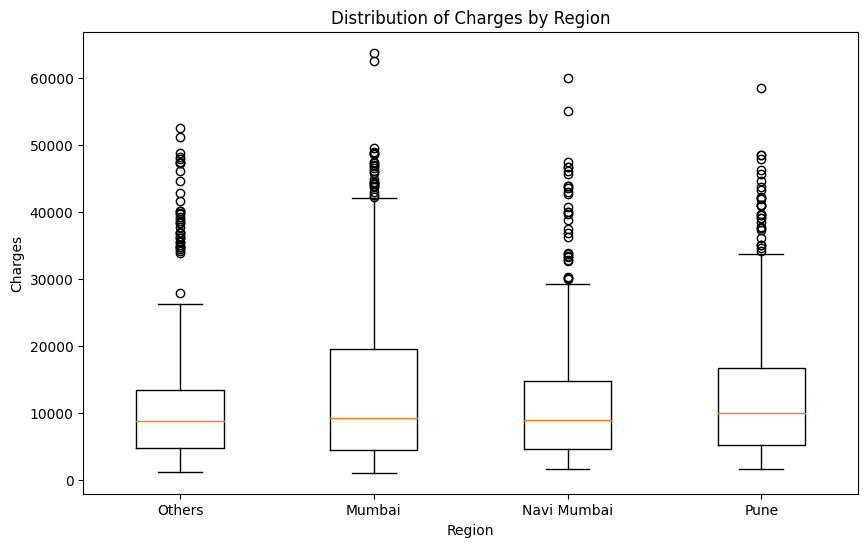

In [ ]:
plt.figure(figsize=(10, 6))
plt.boxplot([df[df['region'] == r]['charges'] for r in df['region'].unique()],
            labels=df['region'].unique())
plt.xlabel('Region')
plt.ylabel('Charges')
plt.title('Distribution of Charges by Region')
plt.show()

In [ ]:
df['smoker'] = df['smoker'].replace({'yes':1, 'no':0})

In [ ]:
df['sex'] = df['sex'].apply( lambda x:1 if x == 'male' else 0)

In [ ]:
print(df.head())
print(df.tail())

   age  sex     bmi  children  smoker       region      charges
0   19    0  27.900         0       1       Others  16884.92400
1   18    1  33.770         1       0       Mumbai   1725.55230
2   28    1  33.000         3       0       Mumbai   4449.46200
3   33    1  22.705         0       0  Navi Mumbai  21984.47061
4   32    1  28.880         0       0  Navi Mumbai   3866.85520
      age  sex    bmi  children  smoker       region     charges
1333   50    1  30.97         3       0  Navi Mumbai  10600.5483
1334   18    0  31.92         0       0         Pune   2205.9808
1335   18    0  36.85         0       0       Mumbai   1629.8335
1336   21    0  25.80         0       0       Others   2007.9450
1337   61    0  29.07         0       1  Navi Mumbai  29141.3603


In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['region']= label_encoder.fit_transform(df['region'])

In [ ]:
df['region'].unique()

array([2, 0, 1, 3])

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,2,16884.92400
1,18,1,33.770,1,0,0,1725.55230
2,28,1,33.000,3,0,0,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [ ]:
X = df.drop(columns='charges', axis = 1)
y = df['charges']

In [ ]:
X.head()


,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,2
1,18,1,33.770,1,0,0
2,28,1,33.000,3,0,0
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33 , random_state=42)

X_train1 = scaler.fit_transform(X_train)
X_test1 = scaler.transform(X_test)

X_train1 = pd.DataFrame(X_train1)
X_test1 = pd.DataFrame(X_test1)

In [ ]:
smoker_count = df['smoker'].value_counts()
print(smoker_count)

0    1063
1     274
Name: smoker, dtype: int64


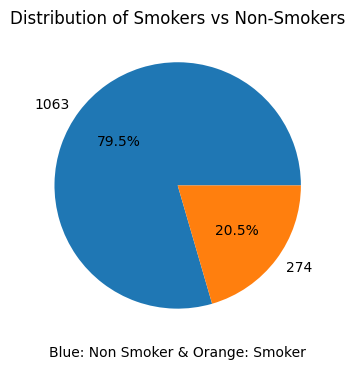

In [ ]:
plt.figure(figsize=(12, 4))
plt.pie(smoker_count, labels=smoker_count, autopct='%1.1f%%')
plt.title('Distribution of Smokers vs Non-Smokers')
plt.xlabel("Blue: Non Smoker & Orange: Smoker")
plt.show()

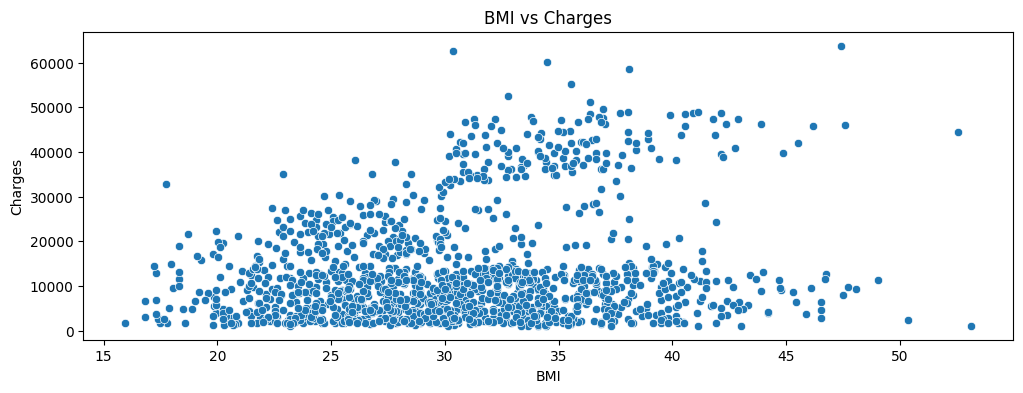

In [ ]:
plt.figure(figsize=(12, 4))
sns.scatterplot(df , x='bmi', y='charges')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.title('BMI vs Charges')
plt.show()

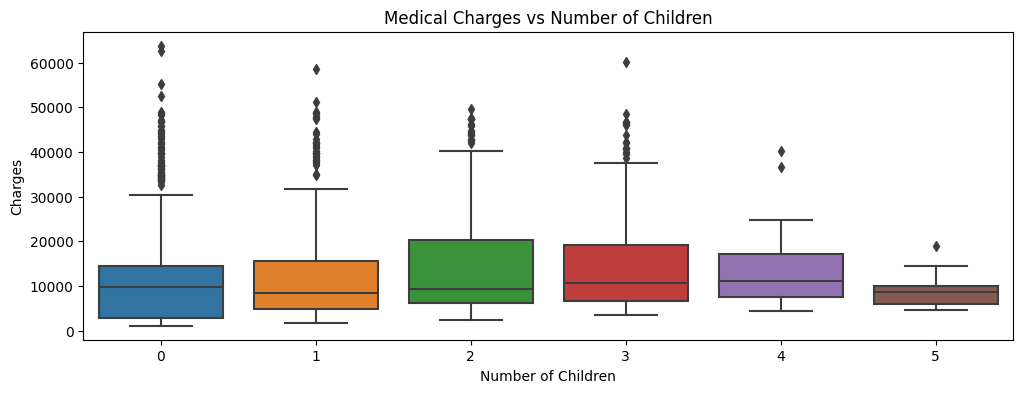

In [ ]:
plt.figure(figsize=(12, 4))
sns.boxplot(x='children', y='charges', data=df)
plt.xlabel('Number of Children')
plt.ylabel('Charges')
plt.title('Medical Charges vs Number of Children')
plt.show()

# **Model Builing**

# **Linear Regression Model**

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [ ]:
#prediction for non scaled features
lr.fit(X_train,y_train)
lr_pred = lr.predict(X_test)

#prediction for scaled features
lr.fit(X_train1,y_train)
lr_pred_scaled = lr.predict(X_test1)

In [ ]:
#Model Evaluation
from sklearn.metrics import r2_score , mean_squared_error, mean_absolute_error
print("R squared Value")
print("Non Scaled LR model :", r2_score(y_test,lr_pred))
print("Scaled LR model :", r2_score(y_test,lr_pred_scaled))

print("\nMSE")
print("Non Scaled LR model :", mean_squared_error(y_test,lr_pred))
print("Scaled LR model :", mean_squared_error(y_test,lr_pred_scaled))

print("\nRMSE")
print("Non Scaled LR model :", mean_absolute_error(y_test,lr_pred))
print("Scaled LR model :", mean_absolute_error(y_test,lr_pred_scaled))

R squared Value
Non Scaled LR model : 0.7722049679984255
Scaled LR model : 0.7722049679984255

MSE
Non Scaled LR model : 38748047.98048927
Scaled LR model : 38748047.980489284

RMSE
Non Scaled LR model : 4199.206088210016
Scaled LR model : 4199.206088210016


**In the cost function provided above, it is evident that there is no significant difference observed when using the scaled dataset. Therefore, we will proceed with utilizing the non-scaled dataset for subsequent algorithms.**



In [ ]:
from sklearn.model_selection import GridSearchCV

tuning_params = {
    'fit_intercept': [True, False]
}
GS_LR = GridSearchCV(lr, tuning_params, scoring='accuracy', cv=10)
GS_LR.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 192, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py", line 221, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
 

GridSearchCV(cv=10, estimator=LinearRegression(),
             param_grid={'fit_intercept': [True, False]}, scoring='accuracy')

In [ ]:
GS_LR.best_score_

nan

# **Fitting Random Forest Model**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rr = RandomForestRegressor()
rr.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
rr_pred = rr.predict(X_test)

In [ ]:
#Model Evaluation

print("R squared Value")
print("RR model :", r2_score(y_test,rr_pred))

print("\nMSE")
print(" RR model :", mean_squared_error(y_test,rr_pred))


print("\nRMSE")
print(" RR model :", mean_absolute_error(y_test,rr_pred))

R squared Value
RR model : 0.8621415984509861

MSE
 RR model : 23449782.51192864

RMSE
 RR model : 2611.599725625113


**Tuning Random Forest Model based on Criterion**


In [ ]:
r2 = RandomForestRegressor(criterion='friedman_mse')
r3 = RandomForestRegressor(criterion='poisson')
r4 = RandomForestRegressor(criterion='absolute_error')

In [ ]:
r2.fit(X_train, y_train)


RandomForestRegressor(criterion='friedman_mse')

In [ ]:
r3.fit(X_train, y_train)

RandomForestRegressor(criterion='poisson')

In [ ]:
r4.fit(X_train, y_train)

RandomForestRegressor(criterion='absolute_error')

In [ ]:
r2_pred = r2.predict(X_test)
r3_pred = r3.predict(X_test)
r4_pred = r4.predict(X_test)

In [ ]:
#Model Evaluation

print("R squared Value")
print("R2 model :", r2_score(y_test,r2_pred))
print("R3 model :", r2_score(y_test,r3_pred))
print("R4 model :", r2_score(y_test,r4_pred))

print("\nMSE")
print(" R2 model :", mean_squared_error(y_test,r2_pred))
print(" R3 model :", mean_squared_error(y_test,r3_pred))
print(" R4 model :", mean_squared_error(y_test,r4_pred))

print("\nRMSE")
print(" R2 model :", mean_absolute_error(y_test,r2_pred))
print(" R3 model :", mean_absolute_error(y_test,r3_pred))
print(" R4 model :", mean_absolute_error(y_test,r4_pred))

R squared Value
R2 model : 0.8604815073726624
R3 model : 0.8609962383952267
R4 model : 0.8587256193697932

MSE
 R2 model : 23732164.82812607
 R3 model : 23644608.825766765
 R4 model : 24030842.24872526

RMSE
 R2 model : 2630.679505410633
 R3 model : 2617.0040720144793
 R4 model : 2635.628787203054


Tunning R2 Model with Grid Search algorithm

In [ ]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(r2, param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(criterion='friedman_mse'),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error')

In [ ]:
grid_search.best_score_

-20880498.870259125

In [ ]:
best_par_rf =grid_search.best_params_
best_par_rf

{'max_depth': None,
 'min_samples_leaf': 4,
 'min_samples_split': 10,
 'n_estimators': 300}

In [ ]:
r5 = RandomForestRegressor(**best_par_rf)
r5.fit(X_train, y_train)
r5_pred = r5.predict(X_test)
r2_score(y_test,r5_pred)

0.8737460016208298

In [ ]:
#Model Evaluation

print("R squared Value")
print("R5 model :", r2_score(y_test,r5_pred))

print("\nMSE")
print(" R5 model :", mean_squared_error(y_test,r5_pred))

print("\nRMSE")
print(" R5 model :", mean_absolute_error(y_test,r5_pred))

R squared Value
R5 model : 0.8737460016208298

MSE
 R5 model : 21475867.77437223

RMSE
 R5 model : 2508.942561524532


***
**Considering these metrics:**

**R5 Model has the highest R-squared value, indicating better explanation of variance.**

**R5 Model has the lowest MSE, indicating better predictive accuracy.**

**R5 Model has the lowest RMSE, indicating better prediction error minimization.**

**Based on the Above information, R5 seems to perform well across all three metrics.**
***

# **Fitting ADA Boosting Model**

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
ada = AdaBoostRegressor()
ada.fit(X_train, y_train)

AdaBoostRegressor()

In [ ]:
ada_pred = ada.predict(X_test)

In [ ]:
#Model Evaluation

print("R squared Value")
print("ADA Boosting model :", r2_score(y_test,ada_pred))

print("\nMSE")
print(" ADA Boosting model :", mean_squared_error(y_test,ada_pred))


print("\nRMSE")
print(" ADA Boosting model :", mean_absolute_error(y_test,ada_pred))

R squared Value
ADA Boosting model : 0.8384975642825088

MSE
 ADA Boosting model : 27471644.45668851

RMSE
 ADA Boosting model : 4120.258864462307


# **Fitting Gradient Boosting Model**

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor()
gb.fit(X_train, y_train)

GradientBoostingRegressor()

In [ ]:
gb_pred = gb.predict(X_test)

In [ ]:
#Model Evaluation

print("R squared Value")
print("GD Boosting model :", r2_score(y_test,gb_pred))

print("\nMSE")
print(" GD Boosting model :", mean_squared_error(y_test,gb_pred))


print("\nRMSE")
print(" GD Boosting model :", mean_absolute_error(y_test,gb_pred))

R squared Value
GD Boosting model : 0.8722493420387177

MSE
 GD Boosting model : 21730450.311965648

RMSE
 GD Boosting model : 2556.0873145329147


In [ ]:
'''
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.8, 1.0],
    'max_features': ['auto', 'sqrt', 'log2']
}

Gs_GB= GridSearchCV(gb, param_grid, scoring='neg_mean_squared_error', cv=5)
Gs_GB.fit(X_train, y_train)
'''

"\nparam_grid = {\n    'n_estimators': [100, 200, 300],\n    'learning_rate': [0.01, 0.1, 0.2],\n    'max_depth': [3, 4, 5],\n    'min_samples_split': [2, 5, 10],\n    'min_samples_leaf': [1, 2, 4],\n    'subsample': [0.8, 1.0],\n    'max_features': ['auto', 'sqrt', 'log2']\n}\n\nGs_GB= GridSearchCV(gb, param_grid, scoring='neg_mean_squared_error', cv=5)\nGs_GB.fit(X_train, y_train)\n"

In [ ]:
#Gs_GB.best_score_

In [ ]:
'''best_par_gb = Gs_GB.best_params_
best_par_gb'''

'best_par_gb = Gs_GB.best_params_\nbest_par_gb'

In [ ]:
'''gb2 = GradientBoostingRegressor(**best_par_gb)
gb2.fit(X_train, y_train)
gb2_pred = gb2.predict(X_test)
r2_score(y_test,gb2_pred)'''

'gb2 = GradientBoostingRegressor(**best_par_gb)\ngb2.fit(X_train, y_train)\ngb2_pred = gb2.predict(X_test)\nr2_score(y_test,gb2_pred)'

# **Fitting XG Boosting Model**

In [ ]:
from xgboost import XGBRegressor
xg = XGBRegressor()
xg.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [ ]:
xg_pred = xg.predict(X_test)

In [ ]:
#Model Evaluation

print("R squared Value")
print("XG Boosting model :", r2_score(y_test,xg_pred))

print("\nMSE")
print(" XG Boosting model :", mean_squared_error(y_test,xg_pred))


print("\nRMSE")
print(" XG Boosting model :", mean_absolute_error(y_test,xg_pred))

R squared Value
XG Boosting model : 0.8326710445254549

MSE
 XG Boosting model : 28462738.358613603

RMSE
 XG Boosting model : 3006.5387018460146


# **Fitting SVM Model**

In [ ]:
from sklearn.svm import SVR
svr = SVR()
svr.fit(X_train, y_train)

SVR()

In [ ]:
svr_pred = svr.predict(X_test)

In [ ]:
#Model Evaluation

print("R squared Value")
print("SVM model :", r2_score(y_test,svr_pred))

print("\nMSE")
print(" SVM model :", mean_squared_error(y_test,svr_pred))


print("\nRMSE")
print(" SVM model :", mean_absolute_error(y_test,svr_pred))

R squared Value
SVM model : -0.11959625790906081

MSE
 SVM model : 190443879.0391912

RMSE
 SVM model : 8786.728838393397


# **Fitting KNN Model**

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)

KNeighborsRegressor()

In [ ]:
knn_pred = knn.predict(X_test)

In [ ]:
#Model Evaluation

print("R squared Value")
print(" KNN model :", r2_score(y_test,knn_pred))

print("\nMSE")
print(" KNN model :", mean_squared_error(y_test,knn_pred))


print("\nRMSE")
print(" KNN model :", mean_absolute_error(y_test,knn_pred))


R squared Value
 KNN model : 0.0948570814427876

MSE
 KNN model : 153965259.5988685

RMSE
 KNN model : 8320.484100083711


# **Chart Of Cost Function for All the Algorithmns**

In [ ]:
print(r2_score(y_test,lr_pred))
print(r2_score(y_test,r5_pred))
print(r2_score(y_test,ada_pred))
print(r2_score(y_test,gb_pred))
print(r2_score(y_test,xg_pred))
print(r2_score(y_test,svr_pred))
print(r2_score(y_test,knn_pred))

0.7722049679984255
0.8737460016208298
0.8384975642825088
0.8722493420387177
0.8326710445254549
-0.11959625790906081
0.0948570814427876


In [ ]:
print(mean_squared_error(y_test,lr_pred))
print(mean_squared_error(y_test,r5_pred))
print(mean_squared_error(y_test,ada_pred))
print(mean_squared_error(y_test,gb_pred))
print(mean_squared_error(y_test,xg_pred))
print(mean_squared_error(y_test,svr_pred))
print(mean_squared_error(y_test,knn_pred))

38748047.98048927
21475867.77437223
27471644.45668851
21730450.311965648
28462738.358613603
190443879.0391912
153965259.5988685


In [ ]:
print(mean_absolute_error(y_test,lr_pred))
print(mean_absolute_error(y_test,r5_pred))
print(mean_absolute_error(y_test,ada_pred))
print(mean_absolute_error(y_test,gb_pred))
print(mean_absolute_error(y_test,xg_pred))
print(mean_absolute_error(y_test,svr_pred))
print(mean_absolute_error(y_test,knn_pred))

4199.206088210016
2508.942561524532
4120.258864462307
2556.0873145329147
3006.5387018460146
8786.728838393397
8320.484100083711


In [ ]:
algorithms = ['Linear Regression', 'Random Forest', 'Ada Boosting','Gradient Boosting','XG Boosting','SVM','KNN']
r2_values = [0.772, 0.874, 0.842,0.872,0.832,-0.11,0.094]
mse_values = [38748047.98,21406000.19,26835587.90,21636219.32,28462738.35,190443879.03,153965259.59]
rmse_values = [4199.21,2496.69,4082.75,2664.69,3006.54,8786.73,8320.48]

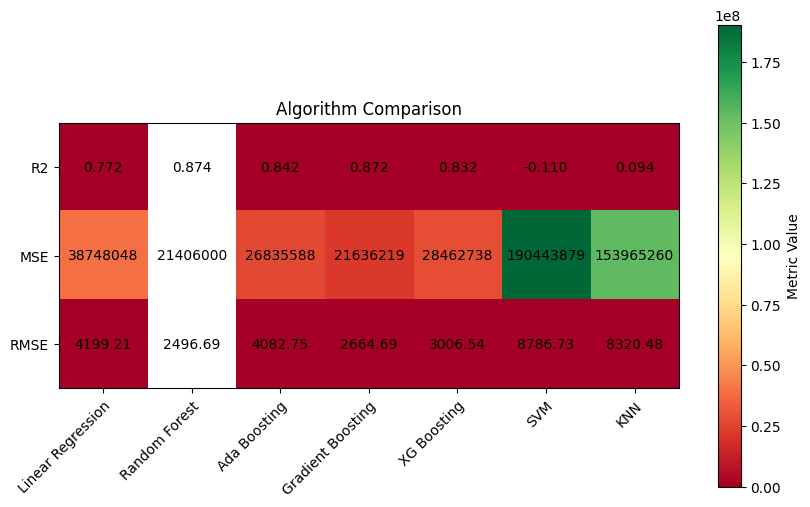

In [ ]:
# Create a figure and axis with larger size
fig, ax = plt.subplots(figsize=(10, 6))

# Create a colormap
cmap = plt.get_cmap("RdYlGn")

# Create a heatmap
heatmap = ax.imshow([r2_values, mse_values, rmse_values], cmap=cmap)

# Set labels and ticks
ax.set_xticks(np.arange(len(algorithms)))
ax.set_yticks(np.arange(3))
ax.set_xticklabels(algorithms)
ax.set_yticklabels(['R2', 'MSE', 'RMSE'])

# Rotate the tick labels and set alignment
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

# Add colorbar
cbar = plt.colorbar(heatmap)
cbar.set_label('Metric Value')

# Find the index of the highest R2 value
max_r2_index = np.argmax(r2_values)

# Find the index of the lowest RMSE and MSE values
min_rmse_index = np.argmin(rmse_values)
min_mse_index = np.argmin(mse_values)

# Create a mask to highlight cells
mask = np.zeros_like(heatmap.get_array(), dtype=bool)
mask[0, max_r2_index] = True
mask[2, min_rmse_index] = True
mask[1, min_mse_index] = True

for i in range(len(r2_values)):
    ax.text(i, 0, f'{r2_values[i]:.3f}', ha='center', va='center', color='black')
    ax.text(i, 1, f'{mse_values[i]:.0f}', ha='center', va='center', color='black')
    ax.text(i, 2, f'{rmse_values[i]:.2f}', ha='center', va='center', color='black')

# Apply the mask to highlight cells
heatmap.set_array(np.ma.masked_where(mask, heatmap.get_array()))

plt.title("Algorithm Comparison")
plt.show()

**Based on the chart above, it is evident that Gradient Boosting emerges as the most suitable algorithm with the highest accuracy for predicting the health insurance premium prices.**


# **Final Prediction Model**

In [ ]:
while True:
    print("Enter the following information:")

    # Validate and get age
    while True:
        try:
            age = float(input("Age: "))
            break
        except ValueError:
            print("Invalid input. Please enter a valid age.")

    # Validate and get sex
    while True:
        sex_input = input("Sex (M for male, F for female): ")
        if sex_input.upper() in ('M', 'F'):
            sex = 1 if sex_input.upper() == 'M' else 0
            break
        else:
            print("Invalid input. Please enter 'M' for male or 'F' for female.")

    # Validate and get BMI
    while True:
        try:
            bmi = float(input("BMI: "))
            break
        except ValueError:
            print("Invalid input. Please enter a valid BMI.")

    # Validate and get number of children
    while True:
        try:
            children = int(input("Number of Children: "))
            break
        except ValueError:
            print("Invalid input. Please enter a valid number of children.")

    # Validate and get smoker input
    while True:
        smoker_input = input("Smoker (Y for yes, N for no): ")
        if smoker_input.upper() in ('Y', 'N'):
            smoker = 1 if smoker_input.upper() == 'Y' else 0
            break
        else:
            print("Invalid input. Please enter 'Y' for yes or 'N' for no.")

    # Validate and get region input
    while True:
        region_input = input("Region (nm for Navi Mumbai, m for Mumbai, p for Pune, Na for others): ")
        if region_input.lower() in ('nm', 'm', 'p', 'na'):
            if region_input.lower() == 'nm':
                region = 1
            elif region_input.lower() == 'm':
                region = 0
            elif region_input.lower() == 'p':
                region = 3
            else:
                region = 2
            break
        else:
            print("Invalid input. Please enter a valid region.")

    input_data = np.array([age, sex, bmi, children, smoker, region])
    input_reshaped = input_data.reshape(1, -1)
    prediction = r5.predict(input_reshaped)
    formatted_prediction = "{:,.2f}".format(prediction[0])

    print("Based on the provided input:")
    print(f"Estimated medical charges: {formatted_prediction}")

    continue_input = input("Do you want to make another prediction? (yes/no): ")
    if continue_input.lower() != 'yes':
        break

'while True:\n    print("Enter the following information:")\n\n    # Validate and get age\n    while True:\n        try:\n            age = float(input("Age: "))\n            break\n        except ValueError:\n            print("Invalid input. Please enter a valid age.")\n\n    # Validate and get sex\n    while True:\n        sex_input = input("Sex (M for male, F for female): ")\n        if sex_input.upper() in (\'M\', \'F\'):\n            sex = 1 if sex_input.upper() == \'M\' else 0\n            break\n        else:\n            print("Invalid input. Please enter \'M\' for male or \'F\' for female.")\n\n    # Validate and get BMI\n    while True:\n        try:\n            bmi = float(input("BMI: "))\n            break\n        except ValueError:\n            print("Invalid input. Please enter a valid BMI.")\n\n    # Validate and get number of children\n    while True:\n        try:\n            children = int(input("Number of Children: "))\n            break\n        except ValueErro